### Model Description

The model is a **Multiple Linear Regression Model** aimed at predicting employee salaries based on their gender, age, and PhD status. It uses polynomial features to capture non-linear relationships between the features and the target variable (salary). The model is trained using the `LinearRegression` algorithm from the `sklearn` library and is evaluated using several performance metrics.

### Dataset Description

The dataset consists of employee information, specifically focusing on the following features:

1. **Gender**: Encoded as 0 for female and 1 for male.
2. **Age**: The age of the employee in years.
3. **PhD**: Encoded as 0 if the employee does not have a PhD and 1 if they do.

The target variable is the **Salary** of the employees. The dataset is split into training and testing sets to evaluate the model's performance on unseen data.

### Steps in the Model Building Process

1. **Import Libraries**: Necessary libraries such as `numpy`, `pandas`, `matplotlib`, `seaborn`, and `sklearn` are imported.
2. **Load the Dataset**: The dataset is loaded into a pandas DataFrame.
3. **Data Standardization**: The features are standardized using `StandardScaler` to ensure they have a mean of 0 and a standard deviation of 1.
4. **Data Visualization**: Pair plots and correlation heatmaps are used to visualize relationships and correlations between features.
5. **Polynomial Features**: Polynomial features are generated to capture non-linear relationships.
6. **Data Splitting**: The data is split into training and testing sets.
7. **Model Training**: The `LinearRegression` model is trained on the training set.
8. **Model Evaluation**: The model's performance is evaluated using various metrics such as R2 score, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). Residual plots are also generated to visualize errors.
9. **Model Saving**: The trained model and scaler are saved using `joblib` for future use in the FastAPI application.
10. **FastAPI Integration**: A FastAPI application is created to serve the model predictions through an API endpoint.

### Example Predictions

The model predicts the salary based on the input features. For example, given the following input:

- Gender: 1 (Male)
- Age: 35
- PhD: 1 (Has PhD)

The model will predict the salary using the polynomial features and the trained regression model.

### Visualization

The model results are visualized using scatter plots for actual vs. predicted salaries, with a perfect prediction line for reference. Additionally, residual plots are generated to visualize the distribution of prediction errors.

### Evaluation Metrics

Several metrics are used to evaluate the model:

- **R2 Score**: Indicates the proportion of variance in the dependent variable that is predictable from the independent variables.
- **Mean Absolute Error (MAE)**: The average absolute difference between actual and predicted values.
- **Mean Squared Error (MSE)**: The average of the squared differences between actual and predicted values.
- **Root Mean Squared Error (RMSE)**: The square root of the MSE, providing a measure of the average magnitude of the prediction errors.
- **Adjusted R2 Score**: Adjusted version of the R2 score that accounts for the number of predictors in the model.

This comprehensive approach ensures the model is well-understood, thoroughly evaluated, and ready for deployment in a real-world application.

Import libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
import joblib

Load the dataset

In [19]:
# Use pandas
dataset = pd.read_csv('Data/Employee_Salaries.csv')
X = dataset[['Gender', 'Age', 'PhD']]  # Independent variables
Y = dataset['Salary']   # Dependent variable (Salary)


In [20]:
dataset.head()

,Salary,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salary  100 non-null    float64
 1   Gender  100 non-null    int64  
 2   Age     100 non-null    int64  
 3   PhD     100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [22]:
dataset.describe()

,Salary,Gender,Age,PhD
count,100.000000,100.000000,100.000000,100.000000
mean,52.524500,0.500000,46.880000,0.390000
std,42.220933,0.502519,15.271469,0.490207
min,0.250000,0.000000,20.000000,0.000000
25%,20.000000,0.000000,31.500000,0.000000
50%,39.300000,0.500000,49.000000,0.000000
75%,75.500000,1.000000,60.000000,1.000000
max,190.000000,1.000000,77.000000,1.000000


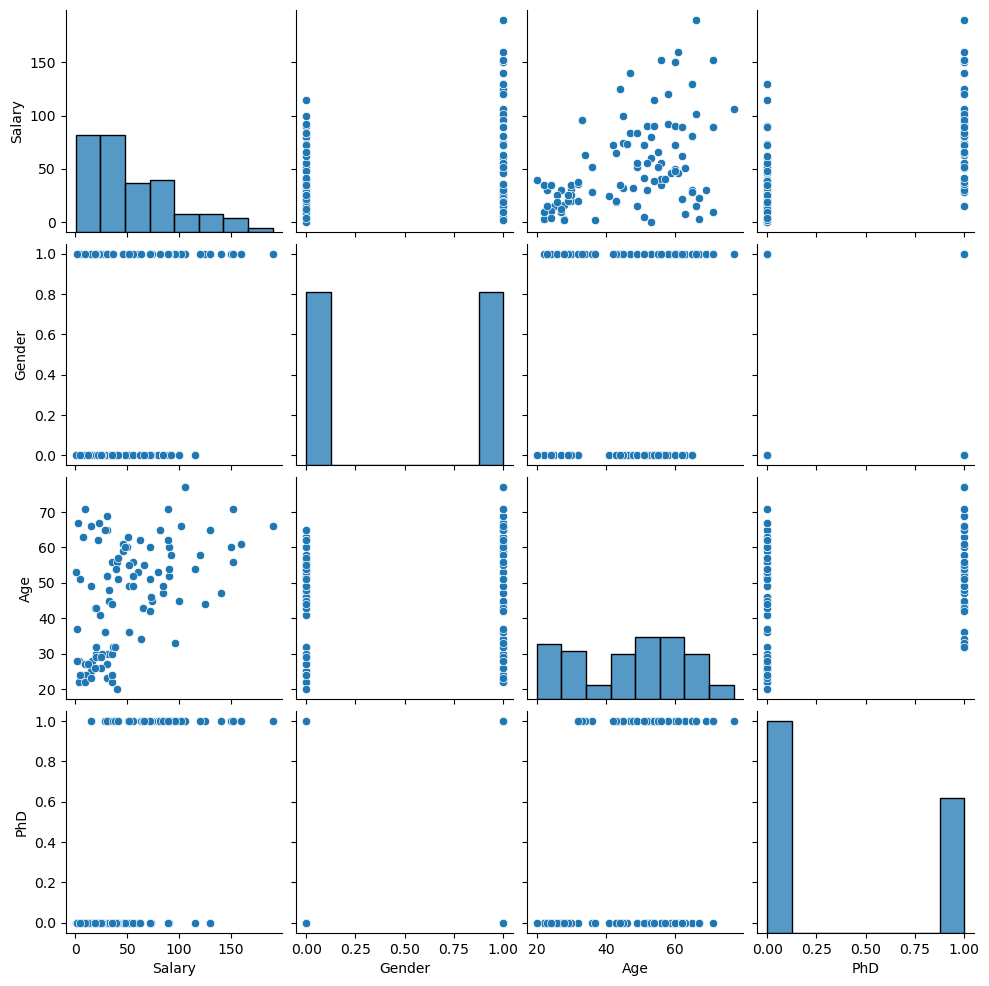

In [23]:
# Use seaborn
sns.pairplot(dataset)
plt.show()

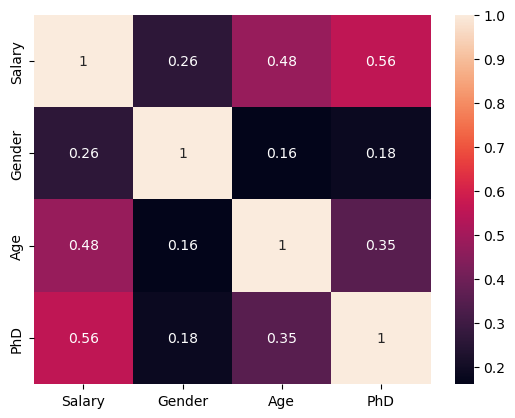

In [24]:
# Building the correlation matrix
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Splitting the data into train and test

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.1, random_state=81)

Fitting Multiple Linear Regression model to training set

In [26]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

Save the model and scaler

In [27]:
# Use joblib
joblib.dump(regressor, '../API/regressor_model.pkl')

['../API/regressor_model.pkl']

Predicting the test set results

In [28]:
Y_pred = regressor.predict(X_test)
Y_pred

array([97.0008885 , 69.84826045, 75.70602449, 36.11803629, 35.74375813,
       14.82317228, 64.82731984, 30.72281753, 74.40665577, 17.33364258])

Evaluate the model

In [29]:
# Use r2_score
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R2 Score: 0.6228698839830704
Mean Absolute Error (MAE): 26.95815134941405
Mean Squared Error (MSE): 984.5541339714116
Root Mean Squared Error (RMSE): 31.377605612465263


Calculate the coefficients and intercepts

In [30]:
coefficients = regressor.coef_
intercept = regressor.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [10.41615937  0.83682343 32.43085545]
Intercept: -5.260590145597476


Coefficients in a dataframe

In [31]:
coef_df = pd.DataFrame(coefficients, X.columns, columns=["coefficients"])
print(coef_df)

        coefficients
Gender     10.416159
Age         0.836823
PhD        32.430855


**Plotting the results**

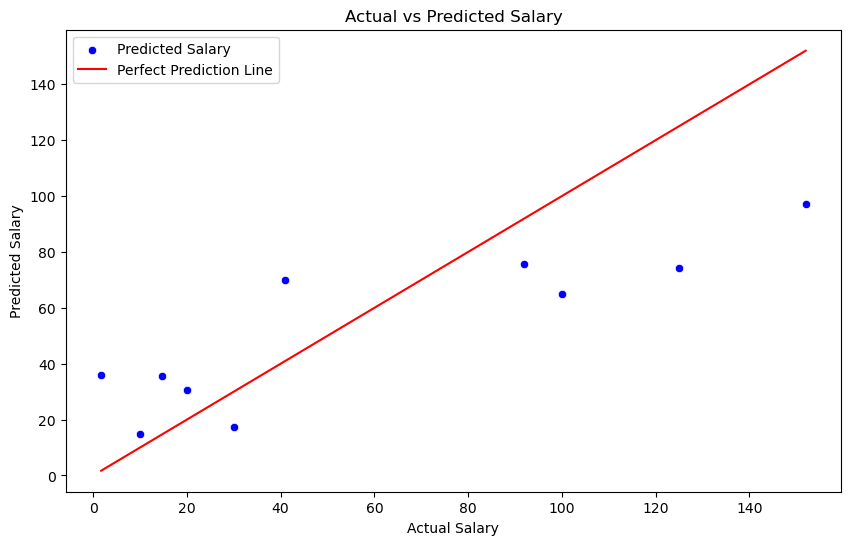

In [32]:
# Plotting the results with actual vs predicted values and a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=Y_pred, color='blue', label='Predicted Salary')
sns.lineplot(x=Y_test, y=Y_test, color='red', label='Perfect Prediction Line')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.show()

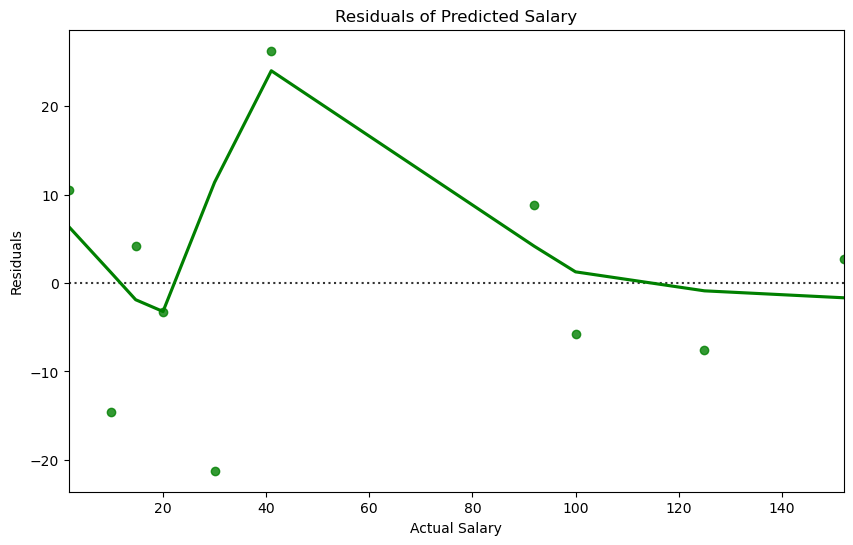

In [33]:
plt.figure(figsize=(10, 6))
sns.residplot(x=Y_test, y=Y_pred, lowess=True, color="g")
plt.xlabel("Actual Salary")
plt.ylabel("Residuals")
plt.title("Residuals of Predicted Salary")
plt.show()